In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features
import pandas as pd
import numpy as np
import folium

In [2]:
import re

#string from flammerouge
input_string = """
1. Huisepontweg (+, 1700 m, Km 110.8), 2. Oude Kwaremont (+, 2300 m, Km 137.0), 3. Eikenberg (+, 1200 m, Km 155.2), 4. Holleweg (+, 700 m, Km 157.3), 5. Kerkgate (+, 1400 m, Km 164.3), 6. Jagerij (+, 800 m, Km 166.7), 7. Molenberg (+, 300 m, Km 171.6), 8. Berg Ten Houte (+, 400 m, Km 197.1), 9. Oude Kwaremont (+, 2300 m, Km 219.2), 10. Paterberg (+, 400 m, Km 222.6), 11. Koppenberg (+, 600 m, Km 229.2), 12. Mariaborrestraat (+, 2000 m, Km 235.3), 13. Taaienberg (+, 500 m, Km 237.0), 14. Oude Kruisberg (+, 500 m, Km 245.5), 15. Oude Kwaremont (+, 1500 m, Km 257.0), 16. Paterberg (+, 400 m, Km 260.5).
"""

pattern = re.compile(r'(?P<seq>\d+)\.\s*(?P<name>[^,]+)\s*\(\+\s*,\s*(?P<length>\d+)\s*m,\s*Km\s*(?P<end_km>\d+\.\d+)\)')

matches = pattern.finditer(input_string)
cobble_sections = [
    {
        "seq": int(match.group("seq")),
        "name": match.group("name").strip(),
        "length": int(match.group("length")),
        "start_km": float(match.group("end_km"))*1000 - float(match.group("length")),
        "end_km": float(match.group("end_km"))*1000
    }
    for match in matches
]

cobble_sections


[{'seq': 1,
  'name': 'Huisepontweg',
  'length': 1700,
  'start_km': 109100.0,
  'end_km': 110800.0},
 {'seq': 2,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 134700.0,
  'end_km': 137000.0},
 {'seq': 3,
  'name': 'Eikenberg',
  'length': 1200,
  'start_km': 154000.0,
  'end_km': 155200.0},
 {'seq': 4,
  'name': 'Holleweg',
  'length': 700,
  'start_km': 156600.0,
  'end_km': 157300.0},
 {'seq': 5,
  'name': 'Kerkgate',
  'length': 1400,
  'start_km': 162900.0,
  'end_km': 164300.0},
 {'seq': 6,
  'name': 'Jagerij',
  'length': 800,
  'start_km': 165900.0,
  'end_km': 166700.0},
 {'seq': 7,
  'name': 'Molenberg',
  'length': 300,
  'start_km': 171300.0,
  'end_km': 171600.0},
 {'seq': 8,
  'name': 'Berg Ten Houte',
  'length': 400,
  'start_km': 196700.0,
  'end_km': 197100.0},
 {'seq': 9,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 216900.0,
  'end_km': 219200.0},
 {'seq': 10,
  'name': 'Paterberg',
  'length': 400,
  'start_km': 222200.0,
  'end_km': 2

In [49]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
#file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(pd.DataFrame(regularized_points))

stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}

In [50]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [51]:
raw_points

,index,lat,lon,elev,dist,segment_dist
0,0,45.65276,7.70637,355.0,0.000000,0.000000
1,1,45.65273,7.70668,354.0,24.324833,24.324833
2,2,45.65262,7.70729,354.0,73.289964,48.965132
3,3,45.65256,7.70750,354.0,90.923303,17.633339
4,4,45.65246,7.70776,354.0,113.989272,23.065968
...,...,...,...,...,...,...
3895,3895,45.30191,7.19172,1767.0,134233.364004,8.630462
3896,3896,45.30194,7.19168,1767.0,134237.937305,4.573301
3897,3897,45.30260,7.18957,1758.0,134418.544804,180.607499
3898,3898,45.30296,7.18830,1754.0,134525.634627,107.089823


In [52]:
processed_points = pd.DataFrame(stage_data['points'])

In [53]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2...",
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,"[44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 5...",
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,"[58, 59, 60, 61, 62, 63, 64, 65, 66, 67]",
...,...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,"[3777, 3778, 3779, 3780, 3781, 3782, 3783, 378...",
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,7.417491,0.000000,"[3804, 3805, 3806, 3807, 3808, 3809, 3810, 381...",
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,"[3830, 3831, 3832, 3833, 3834, 3835, 3836, 383...",
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,"[3849, 3850, 3851, 3852, 3853, 3854, 3855, 385...",


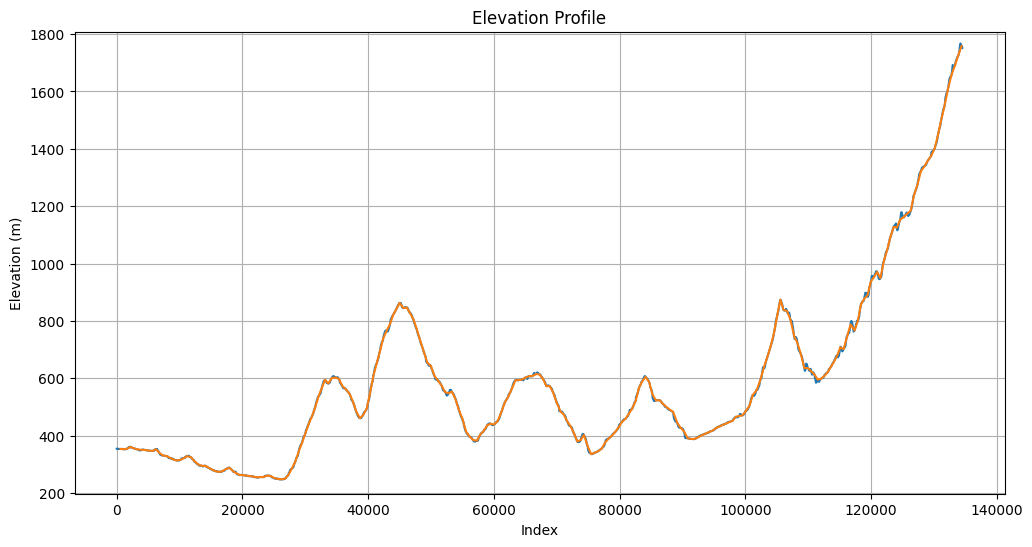

In [54]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

In [55]:

m = folium.Map(location=[raw_points['lat'].iloc[0], raw_points['lon'].iloc[0]], zoom_start=9)

folium.PolyLine(locations=list(zip(filtered['lat'], filtered['lon'])), color='blue', weight=2.5, opacity=1).add_to(m)
m

In [ ]:
# Convert to DataFrame
#stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

'''
'Hills Flat ND': 'blue',
'Hills Flat': 'blue',
'Hills ND': 'blue',
'Hills': 'blue',
'Climb': 'red',
'Flat': 'green',
'Flat Hills': 'green',
'Flat Hills ND': 'green',
'Downhill': 'yellow',
'Hills Climbing ND' : 'red'
'''

# Define color mapping for types
type_colors = {
    'Flat':	'#1de819',
    'Sprint':	'#1de819',
    'Flat Hills':	'#16dfba',
    'Flat Hills ND':	'#16dfba',
    'Hills Flat':	'#18c0e9',
    'Hills Flat ND':	'#18c0e9',
    'Hills':	'#1b29e9',
    'Hills ND':	'#1b29e9',
    'Flat Cobblestone':	'#cfcfcf',
    'Flat Hills Cobblestone':	'#49B27B',
    'Flat Hills Cobblestone ND':	'#49B27B',
    'Hills Cobblestone':	'#757CDC',
    'Hills Cobblestone ND':	'#757CDC',
    'Flat Climbing':	'#65663D',
    'Climbing':	'#774646',
    'Climbing ND':	'#774646',
    'Climbing Hills':	'#583C7C',
    'Climbing Hills ND':	'#583C7C',
    'Hills Climbing':	'#3A33B3',
    'Hills Climbing ND':	'#3A33B3',
    'Cobblestone Flat Climbing':	'#9A9B86',
    'Cobblestone Climbing':	'#C16F6D',
    'Cobblestone Climbing ND':	'#C16F6D',
    'Cobblestone Hills Climbing':	'#9486A6',
    'Cobblestone Hills Climbing ND':	'#9486A6',
    'Downhill':	'#d0f424'
}


#Flat Time Trial	#1de819
#Flat Hills Time Trial	#16dfba
#Hills Time Trial	#1b29e9
#Cobblestone Time Trial	#cfcfcf
#Hills Cobblestone Time Trial	#757CDC
#Climbing Hills Time Trial	#583C7C
#Climbing Time Trial	#774646
#Downhill Time Trial	#d0f424


# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(features_df['dist'], features_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
#for t in type_colors:
for index, row in features_df.iterrows():
    if index > 0:
        plt.fill_betweenx([0, max(features_df['elev'])+150], features_df.iloc[index-1]['dist'], row['dist'], color=type_colors[row['segment_type']], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, np.max(features_df['dist']))
plt.ylim(np.min(features_df['elev']), np.max(features_df['elev']+150))

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
np.cumsum(raw_points.iloc[processed_points[processed_points.delta_dist ==  np.max(processed_points.delta_dist)].indices.values[0]].segment_dist)[50:90]

In [ ]:
processed_points[processed_points.delta_dist ==  np.max(processed_points.delta_dist)].indices.values

In [27]:
features_df.segment_type.unique()

array(['Flat', 'Flat Hills', 'Hills Flat ND', 'Flat Hills ND', 'Hills ND',
       'Downhill', 'Hills Flat', 'Hills Climbing ND', 'Hills'],
      dtype=object)

In [28]:
features_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,indices,feature_type,segment_type
0,44.32864,4.82203,94.0,520.903588,520.903588,1.919741,3.924973,0.000000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",,Flat
1,44.32486,4.82581,102.0,531.414432,1052.318020,1.505416,2.615469,0.000000,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...",,Flat
2,44.32032,4.82558,108.0,515.717991,1568.036011,1.163427,2.171513,0.000000,"[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5...",,Flat
3,44.31447,4.82670,105.0,726.008776,2294.044787,-0.413218,1.343181,-2.637414,"[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 8...",,Flat
4,44.31110,4.83060,112.0,523.005082,2817.049870,1.338419,2.880569,0.000000,"[104, 105, 106, 107, 108, 109, 110, 111, 112, ...",,Flat
...,...,...,...,...,...,...,...,...,...,...,...
272,44.68541,5.94771,1284.0,891.223572,173713.064112,-3.590569,0.000000,0.000000,"[12586, 12587, 12588, 12589, 12590, 12591, 125...",,Downhill
273,44.68484,5.94399,1313.0,924.387364,174637.451477,3.137213,7.850331,-2.927977,"[12673, 12674, 12675, 12676, 12677, 12678, 126...",,Hills Flat ND
274,44.68252,5.94123,1397.0,1181.173955,175818.625432,7.111569,2.474578,2.474578,"[12777, 12778, 12779, 12780, 12781, 12782, 127...",,Hills ND
275,44.67731,5.93975,1430.0,603.199080,176421.824512,5.470831,4.477446,3.312493,"[12893, 12894, 12895, 12896, 12897, 12898, 128...",,Hills ND


In [ ]:
terrains_df = pd.read_csv('Porcentajes.csv')
terrains_df